In [53]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [54]:
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [55]:
import os
import warnings
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
warnings.filterwarnings('ignore')

In [56]:
train_data = pd.read_csv(r"D:\Datasets\train_test_HAR\train.csv")
test_data = pd.read_csv(r"D:\Datasets\train_test_HAR\test.csv")

print(f'Shape of train data is: {train_data.shape}\nShape of test data is: {test_data.shape}')

Shape of train data is: (7352, 563)
Shape of test data is: (2947, 563)


In [57]:
pd.set_option("display.max_columns", None)

In [58]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [59]:
train_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [60]:
train_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [61]:
train_data['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

<AxesSubplot:>

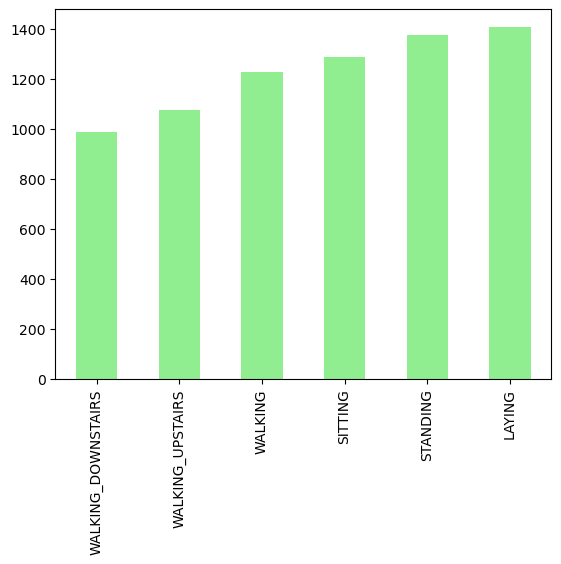

In [62]:
train_data['Activity'].value_counts().sort_values().plot(kind = 'bar', color = 'lightgreen')

In [63]:
x_train, y_train = train_data.iloc[:, :-2], train_data.iloc[:, -1:]
x_test, y_test = test_data.iloc[:, :-2], test_data.iloc[:, -1:]
x_train.shape, y_train.shape

((7352, 561), (7352, 1))

In [64]:
x_train # values for the labels in y_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [65]:
y_train # labels

,Activity
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING
...,...
7347,WALKING_UPSTAIRS
7348,WALKING_UPSTAIRS
7349,WALKING_UPSTAIRS
7350,WALKING_UPSTAIRS


In [66]:
x_test, y_test = test_data.iloc[:, :-2], test_data.iloc[:, -1:]
x_test.shape, y_test.shape

((2947, 561), (2947, 1))

In [67]:
x_test # values for the labels in y_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [68]:
y_test # labels

,Activity
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING
...,...
2942,WALKING_UPSTAIRS
2943,WALKING_UPSTAIRS
2944,WALKING_UPSTAIRS
2945,WALKING_UPSTAIRS


In [69]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [70]:
y_train

array([2, 2, 2, ..., 5, 5, 5])

In [71]:
y_test

array([2, 2, 2, ..., 5, 5, 5])

In [72]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((2947, 561), (2947,), (7352, 561), (7352,))

In [73]:
scaling_data = MinMaxScaler()
x_train = scaling_data.fit_transform(x_train)
x_test = scaling_data.transform(x_test)

# Min-Max Scaling (Normalization): This method scales features to a specific range, usually between 0 and 1.
# It's done using the following formula for each feature:
# scss
# Copy code
# X_normalized = (X - X_min) / (X_max - X_min)
# In this formula:

# X is the original value of the feature.
# X_min is the minimum value of the feature in the dataset.
# X_max is the maximum value of the feature in the dataset.
# Min-max scaling is useful when you want to preserve the relationships between 
# the data points but transform them into a common range.

In [74]:
x_train

array([[0.64429225, 0.48985291, 0.43354743, ..., 0.07937662, 0.79825103,
        0.47068654],
       [0.63920942, 0.49179472, 0.4382399 , ..., 0.0776062 , 0.79848665,
        0.47284164],
       [0.63982653, 0.49026642, 0.44326915, ..., 0.07553327, 0.79872236,
        0.47544109],
       ...,
       [0.63669369, 0.49149469, 0.47748909, ..., 0.11043369, 0.84506893,
        0.52040559],
       [0.64482708, 0.49057848, 0.42085971, ..., 0.10740929, 0.84323381,
        0.51266974],
       [0.67575173, 0.49378844, 0.39806642, ..., 0.10836653, 0.84348837,
        0.51834742]])

In [75]:
x_test

array([[0.62858889, 0.48835738, 0.49267312, ..., 0.13999536, 0.86377885,
        0.47101085],
       [0.64301336, 0.49341832, 0.44045874, ..., 0.15095459, 0.86685151,
        0.45805099],
       [0.63774241, 0.48697479, 0.44092416, ..., 0.14861427, 0.86599918,
        0.4603269 ],
       ...,
       [0.67498305, 0.51503872, 0.44210602, ..., 0.17232158, 0.8622078 ,
        0.59059178],
       [0.61879692, 0.50923343, 0.45175053, ..., 0.17014071, 0.85564749,
        0.59378146],
       [0.57681359, 0.49078175, 0.43149077, ..., 0.16995988, 0.85507555,
        0.5940517 ]])

# Base model

In [91]:
model = Sequential()
model.add(Dense(units=64,kernel_initializer='normal',activation='sigmoid',input_dim=x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=6,kernel_initializer='normal',activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 64, epochs= 10,validation_data = (x_test,y_test))

Epoch 1/10
115/115 [==============================] - 1s 4ms/step - loss: 1.3113 - accuracy: 0.4857 - val_loss: 1.0474 - val_accuracy: 0.7061
Epoch 2/10
115/115 [==============================] - 0s 3ms/step - loss: 0.8964 - accuracy: 0.7220 - val_loss: 0.7506 - val_accuracy: 0.8212
Epoch 3/10
115/115 [==============================] - 0s 3ms/step - loss: 0.6327 - accuracy: 0.8164 - val_loss: 0.5590 - val_accuracy: 0.8273
Epoch 4/10
115/115 [==============================] - 0s 4ms/step - loss: 0.4766 - accuracy: 0.8554 - val_loss: 0.4300 - val_accuracy: 0.8843
Epoch 5/10
115/115 [==============================] - 0s 4ms/step - loss: 0.3846 - accuracy: 0.8819 - val_loss: 0.3653 - val_accuracy: 0.8911
Epoch 6/10
115/115 [==============================] - 0s 3ms/step - loss: 0.3269 - accuracy: 0.8979 - val_loss: 0.3217 - val_accuracy: 0.8921
Epoch 7/10
115/115 [==============================] - 0s 3ms/step - loss: 0.2808 - accuracy: 0.9087 - val_loss: 0.2883 - val_accuracy: 0.9060
Epoch 

# Hypertuning

In [92]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 25)):
        model.add(layers.Dense(units = hp.Int('units' + str(i), min_value=32, max_value=512, step=32),
                               kernel_initializer= hp.Choice('initializer', ['uniform', 'normal']),
                               activation= hp.Choice('activation', ['relu', 'sigmoid', 'tanh'])))
    model.add(layers.Dense(6, kernel_initializer= hp.Choice('initializer', ['uniform', 'normal']), activation='softmax'))
    model.add(
            Dropout(0.2))
    model.compile(
        optimizer = 'adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials= 10,
    executions_per_trial=3,
    directory='project', project_name = 'Human_activity_recognition')

tuner.search_space_summary()

INFO:tensorflow:Reloading Tuner from project\Human_activity_recognition\tuner0.json
Search space summary
Default search space size: 27
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 25, 'step': 1, 'sampling': 'linear'}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
initializer (Choice)
{'default': 'uniform', 'conditions': [], 'values': ['uniform', 'normal'], 'ordered': False}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units4 (Int)
{'default': None, 'conditions': [

In [93]:
tuner.search(x_train, y_train,
             epochs= 10,
             validation_data=(x_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [98]:
tuner.results_summary()

Results summary
Results in project\Human_activity_recognition
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
num_layers: 2
units0: 320
initializer: normal
activation: relu
units1: 192
units2: 224
units3: 32
units4: 512
units5: 256
units6: 384
units7: 448
units8: 384
units9: 320
units10: 384
units11: 416
units12: 96
units13: 224
units14: 352
units15: 416
units16: 32
units17: 64
units18: 32
units19: 160
units20: 416
units21: 224
units22: 128
units23: 256
Score: 0.9334916869799296

Trial 2 summary
Hyperparameters:
num_layers: 9
units0: 416
initializer: normal
activation: relu
units1: 288
units2: 192
units3: 480
units4: 288
units5: 224
units6: 320
units7: 224
units8: 96
units9: 128
units10: 128
units11: 32
units12: 96
units13: 224
units14: 32
units15: 288
units16: 512
units17: 480
units18: 64
units19: 320
Score: 0.763940711816152

Trial 3 summary
Hyperparameters:
num_layers: 11
units0: 480
initializer: normal
activation: relu
units

In [99]:
model=tuner.get_best_models(num_models=1)[0]
history = model.fit(x_train,y_train, epochs=51, validation_data=(x_test,y_test))

Epoch 1/51
230/230 [==============================] - 2s 6ms/step - loss: 0.8221 - accuracy: 0.7723 - val_loss: 0.3874 - val_accuracy: 0.9447
Epoch 2/51
230/230 [==============================] - 1s 5ms/step - loss: 0.7781 - accuracy: 0.7696 - val_loss: 0.4802 - val_accuracy: 0.9372
Epoch 3/51
230/230 [==============================] - 1s 6ms/step - loss: 0.7401 - accuracy: 0.7791 - val_loss: 0.3497 - val_accuracy: 0.9501
Epoch 4/51
230/230 [==============================] - 1s 6ms/step - loss: 0.6947 - accuracy: 0.7810 - val_loss: 0.4940 - val_accuracy: 0.9369
Epoch 5/51
230/230 [==============================] - 1s 5ms/step - loss: 0.7259 - accuracy: 0.7788 - val_loss: 0.6162 - val_accuracy: 0.9284
Epoch 6/51
230/230 [==============================] - 1s 5ms/step - loss: 0.7409 - accuracy: 0.7826 - val_loss: 0.4311 - val_accuracy: 0.9450
Epoch 7/51
230/230 [==============================] - 1s 5ms/step - loss: 0.6208 - accuracy: 0.7909 - val_loss: 0.7562 - val_accuracy: 0.9192
Epoch 

In [100]:
model.save("HAR_model.h5")

In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 320)               179840    
                                                                 
 dense_1 (Dense)             (None, 192)               61632     
                                                                 
 dense_2 (Dense)             (None, 6)                 1158      
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
Total params: 242630 (947.77 KB)
Trainable params: 242630 (947.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
import tensorflow as tf

from tensorflow import keras

Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=20)
mo_fitt = model.fit(x_train,y_train, epochs=200, validation_data=(x_test,y_test), callbacks=Callback)

Epoch 1/200
230/230 [==============================] - 1s 5ms/step - loss: 0.4800 - accuracy: 0.8055 - val_loss: 0.4765 - val_accuracy: 0.9593
Epoch 2/200
230/230 [==============================] - 1s 5ms/step - loss: 0.4614 - accuracy: 0.8063 - val_loss: 0.4798 - val_accuracy: 0.9539
Epoch 3/200
230/230 [==============================] - 1s 5ms/step - loss: 0.5819 - accuracy: 0.8085 - val_loss: 0.7220 - val_accuracy: 0.9348
Epoch 4/200
230/230 [==============================] - 1s 5ms/step - loss: 0.5280 - accuracy: 0.8045 - val_loss: 1.1881 - val_accuracy: 0.9016
Epoch 5/200
230/230 [==============================] - 1s 5ms/step - loss: 0.4811 - accuracy: 0.8143 - val_loss: 0.4512 - val_accuracy: 0.9583
Epoch 6/200
230/230 [==============================] - 1s 5ms/step - loss: 0.4942 - accuracy: 0.8093 - val_loss: 0.5417 - val_accuracy: 0.9535
Epoch 7/200
230/230 [==============================] - 1s 5ms/step - loss: 0.4770 - accuracy: 0.8078 - val_loss: 0.5437 - val_accuracy: 0.9450

Epoch 58/200
230/230 [==============================] - 1s 4ms/step - loss: 0.5065 - accuracy: 0.7979 - val_loss: 0.4826 - val_accuracy: 0.9583
Epoch 59/200
230/230 [==============================] - 1s 4ms/step - loss: 0.4364 - accuracy: 0.8142 - val_loss: 0.6947 - val_accuracy: 0.9430
Epoch 60/200
230/230 [==============================] - 1s 4ms/step - loss: 0.4661 - accuracy: 0.8075 - val_loss: 0.6634 - val_accuracy: 0.9457
Epoch 61/200
230/230 [==============================] - 1s 5ms/step - loss: 0.4143 - accuracy: 0.8245 - val_loss: 0.5281 - val_accuracy: 0.9545
Epoch 62/200
230/230 [==============================] - 1s 5ms/step - loss: 0.4502 - accuracy: 0.8237 - val_loss: 0.5084 - val_accuracy: 0.9566
Epoch 63/200
230/230 [==============================] - 1s 5ms/step - loss: 0.4311 - accuracy: 0.8288 - val_loss: 0.5039 - val_accuracy: 0.9566
Epoch 64/200
230/230 [==============================] - 1s 4ms/step - loss: 0.4609 - accuracy: 0.8317 - val_loss: 0.7902 - val_accuracy:

Epoch 115/200
230/230 [==============================] - 1s 5ms/step - loss: 0.4027 - accuracy: 0.8351 - val_loss: 0.6698 - val_accuracy: 0.9494
Epoch 116/200
230/230 [==============================] - 1s 4ms/step - loss: 0.4086 - accuracy: 0.8294 - val_loss: 0.5053 - val_accuracy: 0.9603
Epoch 117/200
230/230 [==============================] - 1s 4ms/step - loss: 0.4197 - accuracy: 0.8322 - val_loss: 0.4138 - val_accuracy: 0.9647
Epoch 118/200
230/230 [==============================] - 1s 4ms/step - loss: 0.4036 - accuracy: 0.8312 - val_loss: 0.4747 - val_accuracy: 0.9620
Epoch 119/200
230/230 [==============================] - 1s 5ms/step - loss: 0.4193 - accuracy: 0.8247 - val_loss: 0.5099 - val_accuracy: 0.9596
Epoch 120/200
230/230 [==============================] - 1s 5ms/step - loss: 0.3736 - accuracy: 0.8350 - val_loss: 0.4496 - val_accuracy: 0.9640
Epoch 121/200
230/230 [==============================] - 1s 5ms/step - loss: 0.4213 - accuracy: 0.8259 - val_loss: 0.7607 - val_ac

In [83]:
accuracy = mo_fitt.history['accuracy']
loss = mo_fitt.history['loss']
validation_loss = mo_fitt.history['val_loss']
validation_accuracy = mo_fitt.history['val_accuracy']

In [140]:
# Load the trained model
loaded_model = keras.models.load_model('HAR_model.h5')

In [111]:
loaded_model.summary()

# Access specific details about the model
input_shape = loaded_model.input_shape
output_shape = loaded_model.output_shape
model_layers = loaded_model.layers

# Print the input shape, output shape, and number of layers
print("Input Shape:", input_shape)
print("Output Shape:", output_shape)
print("Number of Layers:", len(model_layers))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 320)               179840    
                                                                 
 dense_1 (Dense)             (None, 192)               61632     
                                                                 
 dense_2 (Dense)             (None, 6)                 1158      
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
Total params: 242630 (947.77 KB)
Trainable params: 242630 (947.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Input Shape: (None, 561)
Output Shape: (None, 6)
Number of Layers: 4


In [141]:
# Access the input layer to get the expected input shape
input_layer = loaded_model.layers[0]  # Assuming the input layer is the first layer

# Print the input shape
input_shape = input_layer.input_shape
print(f"Expected Input Shape: {input_shape}")

Expected Input Shape: (None, 561)


In [142]:
action_labels=['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

In [143]:
import cv2
input_video=r"D:\Datasets\office_activity\1_10_walk.MP4"
video_capture = cv2.VideoCapture(input_video)

In [144]:
output_directory=r"C:\Users\HARISH A K\Desktop\python\Deep_Learning\Deep_learning_projects\human_detection_in_footage\HAR"

In [116]:
# Initialize the video capture
video_capture = cv2.VideoCapture(input_video)

frame_count = 0

while True:
    # Read a frame from the video
    ret, frame = video_capture.read()

    if not ret:
        break  # Break the loop if the video has ended

    # Save the frame as an image file
    frame_filename = os.path.join(output_directory, f"frame_{frame_count:04d}.jpg")
    cv2.imwrite(frame_filename, frame)

    frame_count += 1

# Release the video capture
video_capture.release()

print(f"Frames extracted: {frame_count}")

Frames extracted: 249


In [157]:
# Directory where you have saved the extracted frames
image_path = r"C:\Users\HARISH A K\Desktop\python\Deep_Learning\Deep_learning_projects\human_detection_in_footage\HAR\sitting.jfif"

In [158]:
frame = cv2.imread(image_path)

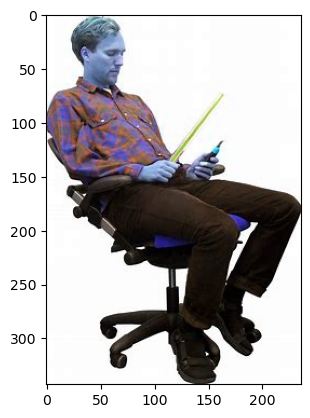

In [159]:
import matplotlib.pyplot as plt
plt.imshow(frame)

In [160]:
frame = cv2.resize(frame, (561, 1))

In [161]:
frame = frame.astype('float32') / 255.0

In [162]:
if frame.shape[-1] != 1:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [163]:
frame = np.reshape(frame, (1, 561))
frame.shape

(1, 561)

In [164]:
predictions = loaded_model.predict(frame)  # frame shape (1, 561)

1/1 [==============================] - 0s 25ms/step


In [171]:
predictions

array([[9.9996829e-01, 3.1657459e-05, 5.7690389e-29, 4.8798506e-33,
        6.5292641e-18, 1.4238369e-13]], dtype=float32)

In [165]:
predicted_action = np.argmax(predictions, axis=1)

In [166]:
predicted_label = action_labels[predicted_action[0]]

In [167]:
print(f"Predicted Action: {predicted_label}")

Predicted Action: STANDING
